# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [2]:
df = pd.read_csv('data/gmedata.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [5]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [16]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [17]:
env.signal_features

array([[ 4.3700e+00,  0.0000e+00],
       [ 4.2300e+00, -1.4000e-01],
       [ 3.7700e+00, -4.6000e-01],
       [ 4.1900e+00,  4.2000e-01],
       [ 3.7600e+00, -4.3000e-01],
       [ 3.8100e+00,  5.0000e-02],
       [ 4.1600e+00,  3.5000e-01],
       [ 4.1700e+00,  1.0000e-02],
       [ 4.4100e+00,  2.4000e-01],
       [ 4.2200e+00, -1.9000e-01],
       [ 3.6500e+00, -5.7000e-01],
       [ 3.5000e+00, -1.5000e-01],
       [ 3.2500e+00, -2.5000e-01],
       [ 2.8500e+00, -4.0000e-01],
       [ 2.8000e+00, -5.0000e-02],
       [ 3.0900e+00,  2.9000e-01],
       [ 3.2700e+00,  1.8000e-01],
       [ 3.4100e+00,  1.4000e-01],
       [ 3.8900e+00,  4.8000e-01],
       [ 4.7400e+00,  8.5000e-01],
       [ 5.9500e+00,  1.2100e+00],
       [ 5.2700e+00, -6.8000e-01],
       [ 5.0300e+00, -2.4000e-01],
       [ 4.8800e+00, -1.5000e-01],
       [ 5.6100e+00,  7.3000e-01],
       [ 4.7800e+00, -8.3000e-01],
       [ 4.8900e+00,  1.1000e-01],
       [ 4.7000e+00, -1.9000e-01],
       [ 4.7700e+00,

# 2. Build Environment

In [18]:
env.action_space

Discrete(2)

info {'total_reward': 48.68000000000002, 'total_profit': 2.2553045372528024, 'position': 0}


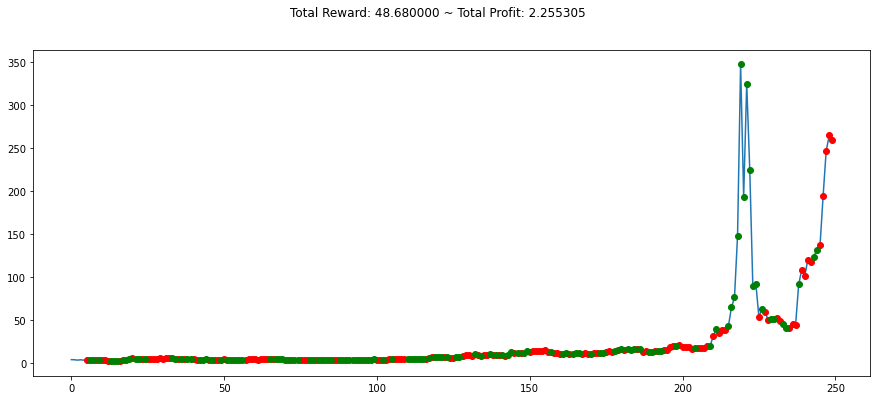

In [19]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [20]:
!pip install finta

In [21]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [26]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [28]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [32]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [33]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.000000,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.000000,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.000000,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.000000,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.000000,29.351457,-9896574.0
2020-03-23,3.58,3.86,3.50,3.81,6009784.0,0.000000,32.102964,-3886790.0
2020-03-24,3.95,4.21,3.89,4.16,6805659.0,0.000000,47.512950,2918869.0
2020-03-25,4.15,4.49,4.04,4.17,3592059.0,0.000000,47.876947,6510928.0
2020-03-26,4.24,4.71,4.24,4.41,6210979.0,0.000000,55.799557,12721907.0


## 2.1.4. Create New Environments

In [35]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [36]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [40]:
env2.signal_features

array([[ 3.90000000e+00,  4.86669600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.11000000e+00,  3.56221000e+06,  0.00000000e+00,
         0.00000000e+00, -3.56221000e+06],
       [ 3.50000000e+00,  3.65170900e+06,  0.00000000e+00,
         0.00000000e+00, -7.21391900e+06],
       [ 3.55000000e+00,  5.03953900e+06,  0.00000000e+00,
         4.33948339e+01, -2.17438000e+06],
       [ 3.65000000e+00,  7.72219400e+06,  0.00000000e+00,
         2.93514572e+01, -9.89657400e+06],
       [ 3.50000000e+00,  6.00978400e+06,  0.00000000e+00,
         3.21029638e+01, -3.88679000e+06],
       [ 3.89000000e+00,  6.80565900e+06,  0.00000000e+00,
         4.75129499e+01,  2.91886900e+06],
       [ 4.04000000e+00,  3.59205900e+06,  0.00000000e+00,
         4.78769470e+01,  6.51092800e+06],
       [ 4.24000000e+00,  6.21097900e+06,  0.00000000e+00,
         5.57995572e+01,  1.27219070e+07],
       [ 4.15000000e+00,  7.02476300e+06,  0.00000000e+00,
         4.93981406e+01

In [39]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


# 3. Build Environment and Train

In [41]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [42]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -467     |
| fps                | 14       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 0.000654 |
---------------------------------
---------------------------------
| explained_variance | -25.8    |
| fps                | 380      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.159    |
| fps                | 439     

---------------------------------
| explained_variance | -666     |
| fps                | 514      |
| nupdates           | 1700     |
| policy_entropy     | 0.378    |
| total_timesteps    | 8500     |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 0.846    |
| fps                | 514      |
| nupdates           | 1800     |
| policy_entropy     | 0.519    |
| total_timesteps    | 9000     |
| value_loss         | 0.0529   |
---------------------------------
---------------------------------
| explained_variance | -70.5    |
| fps                | 515      |
| nupdates           | 1900     |
| policy_entropy     | 0.196    |
| total_timesteps    | 9500     |
| value_loss         | 0.00208  |
---------------------------------
---------------------------------
| explained_variance | 0.727    |
| fps                | 515      |
| nupdates           | 2000     |
| policy_entropy     | 0.428    |
| total_timest

---------------------------------
| explained_variance | -2.94    |
| fps                | 525      |
| nupdates           | 4800     |
| policy_entropy     | 0.069    |
| total_timesteps    | 24000    |
| value_loss         | 0.000452 |
---------------------------------
---------------------------------
| explained_variance | 0.89     |
| fps                | 525      |
| nupdates           | 4900     |
| policy_entropy     | 0.0423   |
| total_timesteps    | 24500    |
| value_loss         | 0.0176   |
---------------------------------
---------------------------------
| explained_variance | -2.31    |
| fps                | 525      |
| nupdates           | 5000     |
| policy_entropy     | 0.0696   |
| total_timesteps    | 25000    |
| value_loss         | 0.000334 |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 525      |
| nupdates           | 5100     |
| policy_entropy     | 0.0813   |
| total_timest

---------------------------------
| explained_variance | 0.985    |
| fps                | 527      |
| nupdates           | 7900     |
| policy_entropy     | 0.0404   |
| total_timesteps    | 39500    |
| value_loss         | 0.00274  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 527      |
| nupdates           | 8000     |
| policy_entropy     | 0.0199   |
| total_timesteps    | 40000    |
| value_loss         | 0.00167  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 526      |
| nupdates           | 8100     |
| policy_entropy     | 0.02     |
| total_timesteps    | 40500    |
| value_loss         | 8.88e-06 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 526      |
| nupdates           | 8200     |
| policy_entropy     | 0.0312   |
| total_timest

KeyboardInterrupt: 

# 4. Evaluation

In [45]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 16.17, 'total_profit': 1.3591332483648229, 'position': 0}


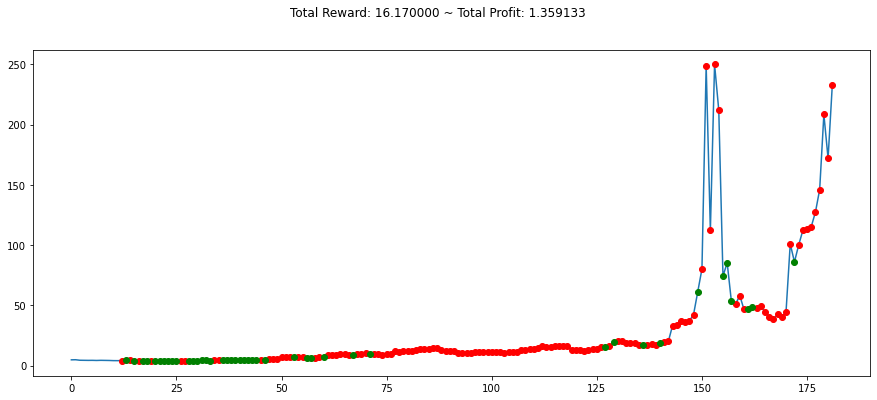

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()